In [49]:
from simulation import generateDag
from sklearn.neural_network import MLPClassifier
import numpy as np
from tqdm import tqdm

def test_params(hidden_layer_sizes, alpha, learning_rate_init, momentum, activation,learning_rate, nums):
    tots = []
    for i in range(10):
        df, z, _, _ = generateDag(nums, 2,100)
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            alpha=alpha,
            learning_rate_init=learning_rate_init,
            momentum=momentum,
            activation=activation,
            learning_rate=learning_rate
            )
        model.fit(np.array(df[z]), np.array(df['A']))
        propensity = model.predict_proba(np.array(df[z]))
        props = propensity[:,1]
        
        IPW_1 = df['Y']*df['A']/(props)
        IPW_0 = (df['Y']*(1-df['A']))/(1 - props)
        # Compute the ACE
        ACE = (diff := IPW_1 - IPW_0).sum() / len(diff)
        tots.append(ACE)
    return sum(tots)/len(tots)


def tune(num,nums, results = None):
    # hidden_layer_sizes, alpha, learning_rate_init, momentum, activation,learning_rate
    if not results:
        results = {}
    params = {
        "hidden_layers_sizes" : [2, 5, 10, 50],
        "alpha" : [0.0001,0.001,0.005,0.01,0.05],
        "learning_rate_init": [0.001,0.005,0.01,0.05,0.1],
        "momentum": [0.5,0.6,0.75,0.8,0.9],
        "activation": ['relu','identity','logistic','tanh'],
        "learning_rate": ['constant','adaptive']
    }
    for i in tqdm(range(num), desc="Running Parameter Search"):
        a = np.random.choice(params["hidden_layers_sizes"])
        b = np.random.choice(params["alpha"])
        c = np.random.choice(params["learning_rate_init"])
        d = np.random.choice(params["momentum"])
        e = np.random.choice(params["activation"])
        f = np.random.choice(params["learning_rate"])
        if (a,b,c,d,e,f) not in results.keys():
            res = test_params([a],b,c,d,e,f, nums)
            results[(a,b,c,d,e,f)] = res
    return results

In [49]:
print(test_params(100, 5, 50, 9, 500))

0.5504198589147851


In [58]:
results_large = tune(50, 2000, results_large)

Running Parameter Search: 100%|██████████| 50/50 [01:23<00:00,  1.68s/it]


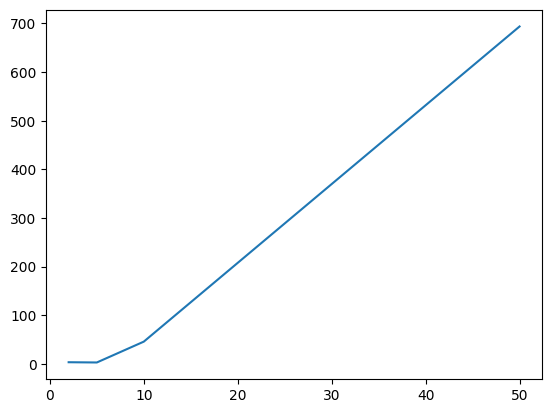

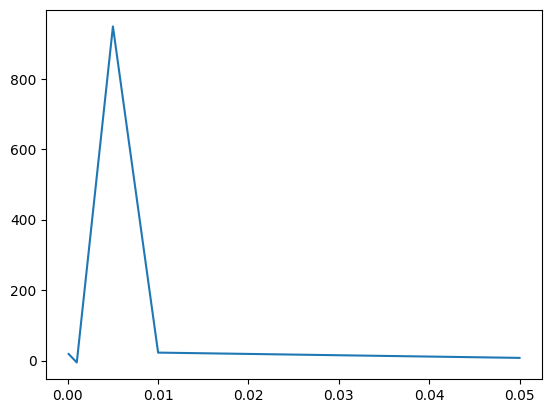

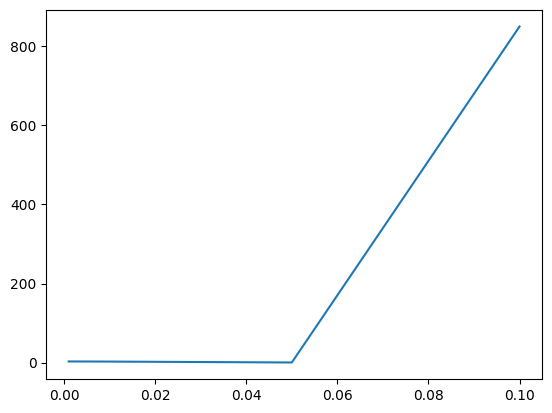

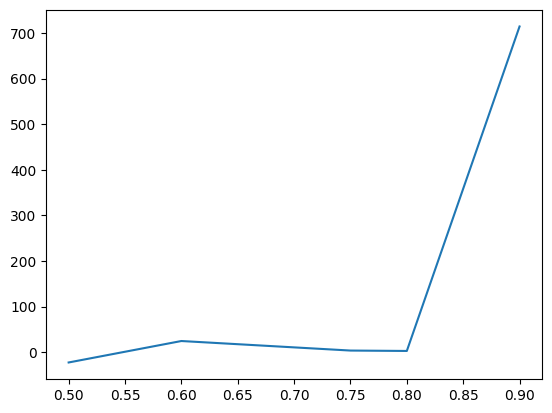

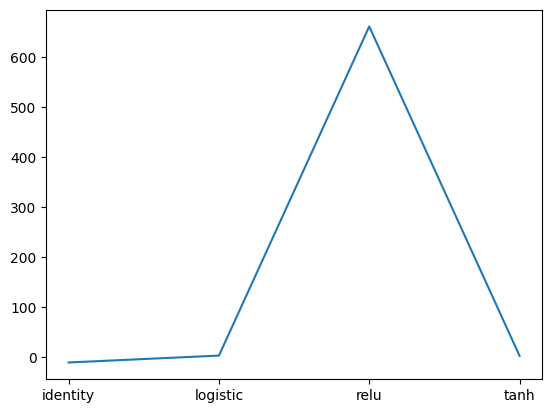

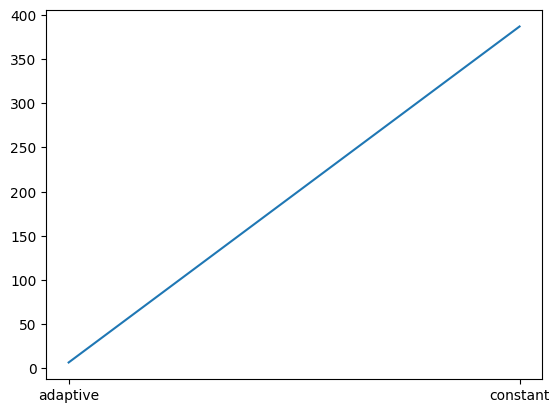

In [59]:
#Graph results
import matplotlib.pyplot as plt

dics = [{},{},{},{},{},{}]

a = {}
b = {}
c = {}
d = {}
e = {}
f = {}

for key, value in results_large.items():
    for i, dic in enumerate(dics):
        if key[i] in dic:
            dic[key[i]].append(value)
        else:
            dic[key[i]] = [value]

for dic in dics:
    n = dict(sorted(dic.items()))
    x = n.keys()
    y = [sum(i)/len(i) for _, i in n.items()]
    fig, ax = plt.subplots()
    ax.plot(x, y)
    plt.show()



In [60]:
# hidden_layer_sizes, alpha, learning_rate_init, momentum, activation,learning_rate
mins = (1,2,3,4,5,6), 10
for key, value in results_large.items():
    if abs(1-value) < abs(1-mins[1]):
        mins = key, value
print(mins)

maxs = (1,2,3,4,5,6), 1
for key, value in results_large.items():
    if abs(1-value) > abs(1-maxs[1]):
        maxs = key, value
print(maxs)

((np.int64(50), np.float64(0.001), np.float64(0.05), np.float64(0.5), np.str_('relu'), np.str_('constant')), np.float64(1.0719382086951823))
((np.int64(50), np.float64(0.005), np.float64(0.1), np.float64(0.9), np.str_('relu'), np.str_('constant')), np.float64(17946.02469092882))
